data is taken from https://pbpython.com/pandas-pivot-table-explained.html
You can also look at the examples in this link about how to use the pivot_table in different ways.

In [1]:
import pandas as pd
import numpy as np

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"


# iloc, loc and related


In [2]:
r  = pd.DataFrame({"a":[1,2,3],"b":[2,2,1],"c":[5,1,2],"d":[1,1,1]}, index=[1,2,3])
r

,a,b,c,d
1,1,2,5,1
2,2,2,1,1
3,3,1,2,1


In [3]:
# use iloc and loc to access data
# iloc is position based, loc is label based.
# use loc and iloc to acess row?
r[["a","c"]]
r.loc[:,"a":"c"]
# r.iloc[:, ?:?]


,a,c
1,1,5
2,2,1
3,3,2


,a,b,c
1,1,2,5
2,2,2,1
3,3,1,2


In [4]:
# lets do a sum of multiple columns
r.loc[:,"a":"c"].sum(axis=1)

1    8
2    5
3    6
dtype: int64

In [5]:
# select a row with certain column values:
r.loc[r["c"]<3]
r.loc[r["b"].idxmin()]
# r.loc[:,r.loc[1,:]==1]

,a,b,c,d
2,2,2,1,1
3,3,1,2,1


a    3
b    1
c    2
d    1
Name: 3, dtype: int64

# Adding columns to DataFrame

In [6]:
r["ab"]= r["a"]*r["b"]
r

,a,b,c,d,ab
1,1,2,5,1,2
2,2,2,1,1,4
3,3,1,2,1,3


# About nan values

In [7]:
# let's first creat a toy example with nan values
import numpy as np
r.iloc[0,0] = np.nan
r.iloc[1,3] = np.nan
r.loc[1,"b"] = np.nan

r

,a,b,c,d,ab
1,NaN,NaN,5,1.0,2
2,2.0,2.0,1,NaN,4
3,3.0,1.0,2,1.0,3


In [8]:
r.dtypes
r.isnull().sum()
# Lets fill the nan value in column "a" with the mean value of "a"
r["a"].fillna(r["a"].mean(), inplace = True)
r

a     float64
b     float64
c       int64
d     float64
ab      int64
dtype: object

a     1
b     1
c     0
d     1
ab    0
dtype: int64

,a,b,c,d,ab
1,2.5,NaN,5,1.0,2
2,2.0,2.0,1,NaN,4
3,3.0,1.0,2,1.0,3


In [9]:
# drop a row when certain column has nan values
r[r["b"].notnull()]
# drop a row when multiple columns have nan values
r.dropna(subset=['a', 'd'], inplace= True)
r

,a,b,c,d,ab
2,2.0,2.0,1,NaN,4
3,3.0,1.0,2,1.0,3


,a,b,c,d,ab
1,2.5,NaN,5,1.0,2
3,3.0,1.0,2,1.0,3


# DataFrame Computation

In [10]:
r.drop(columns = "b")
r[["a","c"]].mul(r["ab"],axis=0)
r[["a","c"]].add(r["ab"],axis=0)

# r[["a","c"]].mul(r[["a","ab"]]) 

,a,c,d,ab
1,2.5,5,1.0,2
3,3.0,2,1.0,3


,a,c
1,5.0,10
3,9.0,6


,a,c
1,4.5,7
3,6.0,5


# Groupby functions and piovt_table

In [11]:
df = pd.read_csv("sales.csv")
df.head()

,Account,Name,Rep,Manager,Product,Quantity,Price,Status
0,714466,Trantow-Barrows,Craig Booker,Debra Henley,CPU,1,30000,presented
1,714466,Trantow-Barrows,Craig Booker,Debra Henley,Software,1,10000,presented
2,714466,Trantow-Barrows,Craig Booker,Debra Henley,Maintenance,2,5000,pending
3,737550,"Fritsch, Russel and Anderson",Craig Booker,Debra Henley,CPU,1,35000,declined
4,146832,Kiehn-Spinka,Daniel Hilton,Debra Henley,CPU,2,65000,won


In [12]:
df.dtypes
df.isnull().sum()

Account      int64
Name        object
Rep         object
Manager     object
Product     object
Quantity     int64
Price        int64
Status      object
dtype: object

Account     0
Name        0
Rep         0
Manager     0
Product     0
Quantity    0
Price       0
Status      0
dtype: int64

In [13]:
# check total quantity each manager have 
df.groupby("Manager").sum()["Quantity"]
# check total number of rows in table each manager have 
df.groupby("Manager").count()["Quantity"]
# df[df["Manager"]=="Debra Henley"]

Manager
Debra Henley     13
Fred Anderson    17
Name: Quantity, dtype: int64

Manager
Debra Henley     9
Fred Anderson    8
Name: Quantity, dtype: int64

In [14]:
# check total quantity each manager have 
df.pivot_table(values=["Quantity"], index=["Manager"], aggfunc=np.sum)
# aggfunc recommendation: [len,np.sum,np.mean]

,Quantity
Manager,
Debra Henley,13
Fred Anderson,17


Quantity              
Manager     Debra Henley Fred Anderson
Product                               
CPU                  7.0          10.0
Maintenance          4.0           4.0
Monitor              NaN           2.0
Software             2.0           1.0

<AxesSubplot:xlabel='Product'>

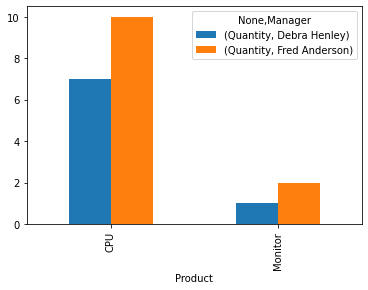

In [15]:
# check total quantity of each product by managers in the table
df_temp =df.pivot_table(values=["Quantity"], index=["Product"], columns = ["Manager"], aggfunc=np.sum)
df_temp
df_temp.loc[["CPU","Monitor"]].fillna(1).plot.bar()

# df.pivot_table(values=["Quantity"], index=["Product","Status"], columns = ["Manager"], aggfunc=np.sum)


In [16]:
# check the number of records(Accounts) of each product by managers in the table
df.pivot_table(values=["Account"], index=["Manager"], columns = ["Product"], aggfunc=len)

Account                             
Product           CPU Maintenance Monitor Software
Manager                                           
Debra Henley      5.0         2.0     NaN      2.0
Fred Anderson     4.0         2.0     1.0      1.0

In [17]:
# find the minimal price of each product by managers in the tableS
df.pivot_table(values=["Price"], index=["Manager"], columns = ["Product"], aggfunc=min)

Price                             
Product            CPU Maintenance Monitor Software
Manager                                            
Debra Henley   30000.0      5000.0     NaN  10000.0
Fred Anderson  30000.0      5000.0  5000.0  10000.0

<AxesSubplot:ylabel='Quantity'>

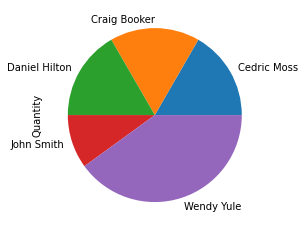

In [18]:
df.groupby("Rep").sum()["Quantity"].plot.pie()